In [65]:
from pandas import read_csv
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sn
import pandas as pd
from sklearn.model_selection import GridSearchCV,train_test_split
import numpy as np
from matplotlib.pyplot import *
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix


In [30]:
df = pd.read_csv("C:/Users/walid/Desktop/zoo/class.csv")
df

,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,2,20,Bird,"chicken, crow, dove, duck, flamingo, gull, haw..."
2,3,5,Reptile,"pitviper, seasnake, slowworm, tortoise, tuatara"
3,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
4,5,4,Amphibian,"frog, frog, newt, toad"
5,6,8,Bug,"flea, gnat, honeybee, housefly, ladybird, moth..."
6,7,10,Invertebrate,"clam, crab, crayfish, lobster, octopus, scorpi..."


In [31]:
df2 = pd.read_csv("C:/Users/walid/Desktop/zoo/zoo.csv")
df2

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [32]:
df2.shape #On jette un coup d'oeil sur le dataset

(101, 18)

In [33]:
list(df2)

['animal_name',
 'hair',
 'feathers',
 'eggs',
 'milk',
 'airborne',
 'aquatic',
 'predator',
 'toothed',
 'backbone',
 'breathes',
 'venomous',
 'fins',
 'legs',
 'tail',
 'domestic',
 'catsize',
 'class_type']

In [34]:
df2.drop("animal_name",axis=1,inplace =True)

In [35]:
df2

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [36]:
df2.isna().sum() #on pouvait utiliser la librairie MissingNo pour identifier les NA 

hair          0
feathers      0
eggs          0
milk          0
airborne      0
aquatic       0
predator      0
toothed       0
backbone      0
breathes      0
venomous      0
fins          0
legs          0
tail          0
domestic      0
catsize       0
class_type    0
dtype: int64

In [37]:
df2.dtypes 

hair          int64
feathers      int64
eggs          int64
milk          int64
airborne      int64
aquatic       int64
predator      int64
toothed       int64
backbone      int64
breathes      int64
venomous      int64
fins          int64
legs          int64
tail          int64
domestic      int64
catsize       int64
class_type    int64
dtype: object

In [38]:
x = df2['class_type'].value_counts().index.tolist()
y = df2['class_type'].value_counts().tolist()
fig = px.bar(x=x, y=y, title="Repartition des classes", labels={'x': 'classe d animal','y': 'count'},)
fig.show() # repartition des classes via BarPlot

In [39]:
labels = ["Mammelle","Oiseau","Reptile","Poisson","Amphibien","Insecte","Invertebre"]
values = df2['class_type'].value_counts().tolist()
px.pie(df, values=values, names=labels, title="Distribution de classes d animaux")

In [40]:
# ------- Notre but est de predire la classe de l'animal en dependant des Features que nous avons , du coup notre Target est la colonne Class-type

features = df2.drop("class_type", axis=1)
features

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [41]:
target = df2["class_type"]
target

0      1
1      1
2      4
3      1
4      1
      ..
96     1
97     6
98     1
99     7
100    2
Name: class_type, Length: 101, dtype: int64

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)
X = df2.iloc[:, :2].values

In [115]:
features.shape

(101, 16)

In [51]:
len(X_train), len(X_test)

(70, 31)

In [145]:
# -----------------Utilisation du decision tree ----------------------

dec = DecisionTreeClassifier(random_state=1)
dec = dec.fit(X_train,y_train)
pred = dec.predict(X_test)


print(str(accuracy_score(y_test,pred)))

# ----------------------- utilisation du RandomForestClassifier -------------------------------

forest=RandomForestClassifier(max_depth=3) #le max depth le plus optimal est 12 dans notre cas
forest.fit(X_train,y_train)
y_pred=forest.predict(X_test)
final_predict_df=pd.DataFrame({'Animal':X_test.index,'Prediction du type':y_pred,'Type':y_test})
final_predict_df

0.9354838709677419


,Animal,Prediction du type,Type
84,84,1,1
55,55,1,1
66,66,1,1
67,67,1,1
45,45,1,1
39,39,6,6
22,22,1,1
44,44,1,1
10,10,1,1
0,0,1,1


In [119]:
y_test

84    1
55    1
66    1
67    1
45    1
39    6
22    1
44    1
10    1
0     1
18    4
30    6
97    6
33    2
77    7
4     1
93    1
78    2
12    4
31    1
76    3
89    5
26    5
42    6
70    1
15    7
40    6
72    7
9     1
96    1
11    2
Name: class_type, dtype: int64

In [124]:
 data = confusion_matrix(y_test, pred, labels=[1,2,3,4,5,6,7])

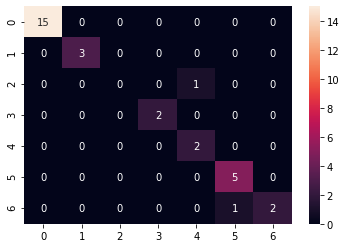

In [125]:
import seaborn as snNew
import pandas as pdNew
import matplotlib.pyplot as pltNew


snNew.heatmap(data, annot=True)
pltNew.show()

In [47]:
# --------------- Utilisation du KNN --------------------

from sklearn.neighbors import KNeighborsClassifier
n_neighbors = np.array(range(1,40))
param_grid = dict(n_neighbors=n_neighbors)
param_grid

{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39])}

In [150]:
from sklearn.model_selection import GridSearchCV,train_test_split
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid,cv=10)
grid.fit(X_train, y_train)
print(grid.best_params_)

D:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning:

The least populated class in y has only 2 members, which is less than n_splits=10.



{'n_neighbors': 1}


D:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning:

The least populated class in y has only 2 members, which is less than n_splits=10.

D:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning:

The least populated class in y has only 2 members, which is less than n_splits=10.

D:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning:

The least populated class in y has only 2 members, which is less than n_splits=10.

D:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning:

The least populated class in y has only 2 members, which is less than n_splits=10.

D:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning:

The least populated class in y has only 2 members, which is less than n_splits=10.

D:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning:

The least populated class in y has only 2 members, which is less than n_splits=10.

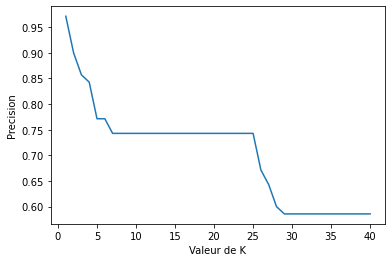

In [153]:
#Apres utilisation du Gridsearch , on a trouve que 1 est la meilleure valeur pour l'utilisation du KNN
%matplotlib inline

k_range = range(1, 41)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10)
    k_scores.append(scores.mean())

plt.plot(k_range, k_scores)
plt.xlabel('Valeur de K')
plt.ylabel('Precision')
plt.show()


In [156]:
model = KNeighborsClassifier(n_neighbors =2).fit(X_train,y_train)
y_predi = model.predict(X_test)
accuracy = accuracy_score(y_test,y_predi)
print(accuracy)

0.967741935483871


In [157]:
# ----------------- Utilisation du SVM ------------------

from sklearn.metrics import plot_confusion_matrix

ml = svm.SVC(kernel='linear',)

ml.fit(X_train, y_train)

y_pred = ml.predict(X_test)

ml.score(y_test,y_pred)



0.9354838709677419

In [146]:
# ------------------- utilisation du neural network ---------------

from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='lbfgs', 
                    alpha=1e-5,
                    hidden_layer_sizes=(6,), 
                    random_state=1)

clf.fit(X_train, y_train)   

clf.score(X_test, y_test)


predictions_train = clf.predict([y_train])
predictions_test = clf.predict(y_test)
train_score = accuracy_score(X_train, y_train)
print("score on train data: ", y_train)
test_score = accuracy_score(predictions_test, test_labels)
print("score on test data: ", Y_test)

ValueError: X has 70 features, but MLPClassifier is expecting 16 features as input.